In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
train = pd.read_csv("C:\\Users\\sadis\\Desktop\\inceptez\\Statistics\\ML\\Assignments\\BigMartDataSet\\train.csv")
test = pd.read_csv("C:\\Users\\sadis\\Desktop\\inceptez\\Statistics\\ML\\Assignments\\BigMartDataSet\\test.csv")

In [4]:
train.columns.difference(test.columns)

Index(['Item_Outlet_Sales'], dtype='object')

In [5]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [7]:
train['Source']= 'train'
test['Source']= 'test'

In [8]:
df = pd.concat([train,test])

In [9]:
#Check whether new column is added
df.loc[df['Source'] == 'train'][:3]
#df[:2]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train


In [10]:
#splitting numerical and Categorical data
#remove 
#1.Outlet_Establishment_Year 
#2."Y"/Independent Variable (Item_Outlet_Sales)

numerical_columns = df.select_dtypes(include=np.number).drop(columns = ['Outlet_Establishment_Year','Item_Outlet_Sales'])
categorical_columns = df.select_dtypes(exclude = np.number).columns

# Fixing Categorical Data Issues (One way by using Mode)
1. High Cardinality (More number of distinct values in "Item_Identifier"). Try to group it
2. Incosistent data in "Item_Fat_Content". Replace and Combine the values
3. Fill the missing Outlet_Size values using Mode of "Outype_type"
4. Check the relationship between "Item_Type" by "Item_identifier"
5. Check the relationship between "Outlet_Type" and "Outlet_Size"
6. Check the relationship between "Item_Identifier" and "Item_Fat_Content"

In [11]:
df[categorical_columns].apply (lambda x: print(x.value_counts()))

FDS08    10
FDL09    10
FDU57    10
NCV41    10
NCM18    10
         ..
FDS22     7
NCW54     7
FDO33     7
FDL50     7
FDM50     7
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
OUT027    1559
OUT013    1553
OUT049    1550
OUT035    1550
OUT046    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64
Med

Item_Identifier         None
Item_Fat_Content        None
Item_Type               None
Outlet_Identifier       None
Outlet_Size             None
Outlet_Location_Type    None
Outlet_Type             None
Source                  None
dtype: object

In [12]:
#Step1: High Cardinality (More number of distinct values in "Item_Identifier"). Try to group it
df['Item_Identifier_2']= df['Item_Identifier'].apply (lambda x: x[:2])
df['Item_Identifier_2'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Identifier_2, dtype: int64

In [13]:
#Step2: Incosistent data in "Item_Fat_Content". Replace and Combine the values
df['Item_Fat_Content']= df['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [14]:
#Step3: Fill the missing Outlet_Size values using Mode of "Outype_type"
df['Outlet_Size'] = df.groupby(by = ['Outlet_Type']).Outlet_Size.transform(lambda x: x.fillna(x.mode()[0]))

In [15]:
#Step4: Check the relationship between "Item_Type" by "Item_identifier"
df.groupby(by=['Item_Identifier_2','Item_Type'])['Item_Identifier'].count()

Item_Identifier_2  Item_Type            
DR                 Dairy                     229
                   Hard Drinks               362
                   Soft Drinks               726
FD                 Baking Goods             1086
                   Breads                    416
                   Breakfast                 186
                   Canned                   1084
                   Dairy                     907
                   Frozen Foods             1426
                   Fruits and Vegetables    2013
                   Meat                      736
                   Seafood                    89
                   Snack Foods              1989
                   Starchy Foods             269
NC                 Health and Hygiene        858
                   Household                1548
                   Others                    280
Name: Item_Identifier, dtype: int64

In [16]:
#Step5: Check the relation between Outlet Type and Outlet Size
train.groupby(['Outlet_Type','Outlet_Size'])['Item_Outlet_Sales'].mean()

Outlet_Type        Outlet_Size
Grocery Store      Small           340.329723
Supermarket Type1  High           2298.995256
                   Medium         2348.354635
                   Small          2358.343066
Supermarket Type2  Medium         1995.498739
Supermarket Type3  Medium         3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [17]:
train.groupby(['Outlet_Type'])['Item_Outlet_Sales'].mean()

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [18]:
train.groupby(['Outlet_Size'])['Item_Outlet_Sales'].mean()

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [19]:
#Step6: Check the relationship between "Item_Identifier" and "Item_Fat_Content"
df.groupby(['Item_Identifier_2','Item_Fat_Content']).count()

Item_Identifier  Item_Weight  \
Item_Identifier_2 Item_Fat_Content                                 
DR                Low Fat                      1208         1006   
                  Regular                       109           91   
FD                Low Fat                      5291         4378   
                  Regular                      4910         4067   
NC                Low Fat                      2686         2223   

                                    Item_Visibility  Item_Type  Item_MRP  \
Item_Identifier_2 Item_Fat_Content                                         
DR                Low Fat                      1208       1208      1208   
                  Regular                       109        109       109   
FD                Low Fat                      5291       5291      5291   
                  Regular                      4910       4910      4910   
NC                Low Fat                      2686       2686      2686   

                                    Outlet_Identifier  \
Item_Identifier_2 Item_Fat_Content                      
DR                Low Fat                        1208   
                  Regular                         109   
FD                Low Fat                        5291   
                  Regular                        4910   
NC                Low Fat                        2686   

                                    Outlet_Establishment_Year  Outlet_Size  \
Item_Identifier_2 Item_Fat_Content                                           
DR                Low Fat                                1208         1208   
                  Regular                                 109          109   
FD                Low Fat                                5291         5291   
                  Regular                                4910         4910   
NC                Low Fat                                2686         2686   

                                    Outlet_Location_Type  Outlet_Type  \
Item_Identifier_2 Item_Fat_Content                                      
DR                Low Fat                           1208         1208   
                  Regular                            109          109   
FD                Low Fat                           5291         5291   
                  Regular                           4910         4910   
NC                Low Fat                           2686         2686   

                                    Item_Outlet_Sales  Source  
Item_Identifier_2 Item_Fat_Content                             
DR                Low Fat                         728    1208  
                  Regular                          71     109  
FD                Low Fat                        3190    5291  
                  Regular                        2935    4910  
NC                Low Fat                        1599    2686

In [53]:
df.drop(columns = ['Outlet_Size'],inplace = True)

# Fixing the Numerical Data - using mean/median 
1. Fix the NA values for "Item_Weight" using "Item_Identifier"
2. Fill Zero as NaN and update with Mean/Median Values

In [20]:
numerical_columns = numerical_columns.columns
numerical_columns.isna().sum()

0

In [21]:
#Step1: Try to Fix the NA values for "Item_Weight" using "Item_Type"
df.groupby(['Item_Type'])['Item_Weight'].mean()

Item_Type
Baking Goods             12.275211
Breads                   11.152362
Breakfast                13.179112
Canned                   12.340830
Dairy                    13.238358
Frozen Foods             12.569323
Fruits and Vegetables    13.194406
Hard Drinks              11.576205
Health and Hygiene       13.171739
Household                13.337977
Meat                     12.766104
Others                   13.915724
Seafood                  12.760274
Snack Foods              12.865732
Soft Drinks              11.788408
Starchy Foods            13.659758
Name: Item_Weight, dtype: float64

In [22]:
#Try to Fix the NA values for "Item_Weight" using "Item_Identifier"
df.groupby(['Item_Identifier_2'])['Item_Weight'].mean()

Item_Identifier_2
DR    12.116645
FD    12.735577
NC    13.344139
Name: Item_Weight, dtype: float64

In [23]:
#Since Both groupby are giving similar kind of result, will use Item_Identifier"
df['Item_Weight'] = df.groupby('Item_Identifier_2').Item_Weight.transform(lambda x: x.fillna(x.mean()))

In [24]:
#Step2: Fill Zero as NaN and update with Mean/Median Values
df.loc[df['Item_Visibility']==0.000000,'Item_Visibility'] = np.nan
df['Item_Visibility'] = df.groupby('Item_Identifier_2').Item_Visibility.transform(lambda x: x.fillna(x.mean())) 

In [25]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
Item_Identifier_2               0
dtype: int64

In [27]:
# Data Preprocessing completed
# Split the data again into Train and Test
train = df.loc[df['Source']=='train']
test = df.loc[df['Source']=='test']

<AxesSubplot:>

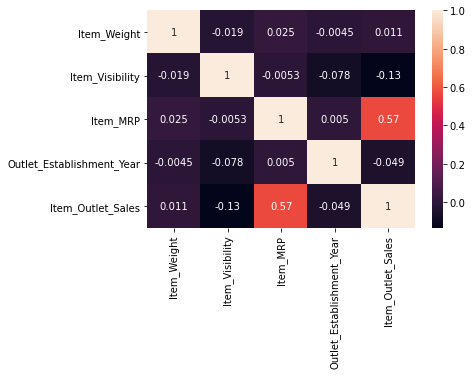

In [31]:
corr_ = train.corr()
sns.heatmap(corr_, annot = True)

In [32]:
X = train.select_dtypes(include=np.number).drop(columns = 'Item_Outlet_Sales')

In [36]:
vif_data = pd.DataFrame()
vif_data['Features'] = X.columns
vif_data

,Features
0,Item_Weight
1,Item_Visibility
2,Item_MRP
3,Outlet_Establishment_Year


In [55]:
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,Features,VIF
0,Item_Weight,10.240523
1,Item_Visibility,3.088807
2,Item_MRP,6.130512
3,Outlet_Establishment_Year,17.297057


In [56]:
df['Out_age'] = 2013 - df['Outlet_Establishment_Year']

In [57]:
df.drop(columns = ['Outlet_Establishment_Year'],inplace = True)

In [58]:
#Re-running the VIF again
train = df.loc[df['Source']=='train']
test = df.loc[df['Source']=='test']


train.drop(columns = ['Source'],inplace = True)
test.drop(columns = ['Source'],inplace = True)


X = train.select_dtypes(include=np.number).drop(columns = 'Item_Outlet_Sales')
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,features,VIF
0,Item_Weight,5.676698
1,Item_Visibility,2.818615
2,Item_MRP,4.656593
3,Out_age,3.696189


In [60]:
df_numbers = df.select_dtypes(include=np.number)
df_categories = df.select_dtypes(exclude = np.number).drop(columns = ['Outlet_Identifier','Item_Identifier','Source'])

In [63]:
df_categories_encoded = pd.get_dummies(df_categories)
#There are 2 Option. 1 is One Hot Encoding and 2 is Dummy variable
#Dummy variable encoded vectors - Reducing the number of columns
#Dropping category with less values 
#pd.get_dummies(df_categories['Item_Identifier_2'],drop_first = True)

In [64]:
df_final = pd.concat([df_numbers,df_categories_encoded,df[['Outlet_Identifier','Item_Identifier','Source']]],axis = 1)

In [66]:
df_final.to_excel("C:\\Users\\sadis\\Desktop\\inceptez\\Statistics\\ML\\Assignments\\Pre_processed_data.xlsx",index = False)